The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


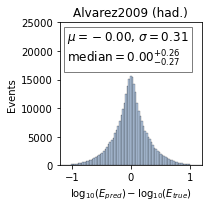

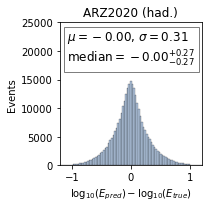

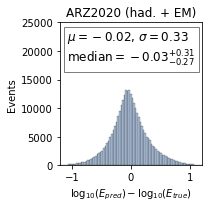

In [5]:
from matplotlib import pyplot as plt
from toolbox import get_histogram2d, get_pred_energy_diff_data, calculate_percentage_interval
from radiotools import plthelpers as php
from plthelpers import plot_hist_stats
import numpy as np

# run_id = "E9.1"
for run_id in ["E12.1", "E9.1", "E13.1"]:

    # Save the run name
    run_name = f"run{run_id}"

    # Constants
    plot_title = f"HISTOGRAM {run_name}"

    

    # %%
    energy_difference_data, shower_energy_log10_predict, shower_energy_log10 = get_pred_energy_diff_data(run_name, True)

    # Redefine N
    N = energy_difference_data.size

    # Calculate 68 %
    energy_68 = calculate_percentage_interval(energy_difference_data, 0.68)

    delta_log_E_string = r"$\log_{10}(E_{pred}) - \log_{10}(E_{true})$"
    plt.rcParams["figure.figsize"] = (4.8,4.8)
    # fig, ax = php.get_histogram(predicted_nu_energy[:, 0], bins=np.arange(17, 20.1, 0.05), xlabel="predicted energy")
    plt.rcParams["figure.figsize"] = (3.0,3.0)
    fig, ax = php.get_histogram(energy_difference_data, bins=np.linspace(-1.2, 1.2, 90),
                                xlabel=f"{delta_log_E_string}", ylabel="Events", stats=False,
                                kwargs={'color':"lightsteelblue", 'ec':"k", 'linewidth':0.2})
    plot_hist_stats(ax, energy_difference_data, N=False)
    ax.set_ylim((0, 25000))
    # ax.plot(xl, N*stats.rayleigh(scale=scale, loc=loc).pdf(xl))


    if run_id == "E12.1": # Alvarez2009 (had.)
        # plot_title = f"Energy resolution for dataset Alvarez2009 (had.)\nwith 68 % interval of {delta_log_E_string} at {energy_68:.2f}"
        plot_title = "Alvarez2009 (had.)"
    elif run_id == "E9.1": # ARZ2020 (had.)
        # plot_title = f"Energy resolution for dataset ARZ2020 (had.)\nwith 68 % interval of {delta_log_E_string} at {energy_68:.2f}"
        plot_title = "ARZ2020 (had.)"
    elif run_id == "E13.1": # ARZ2020 (had. + EM)
        # plot_title = f"Energy resolution for dataset ARZ2020 (had. + EM)\nwith 68 % interval of {delta_log_E_string} at {energy_68:.2f}"
        plot_title = "ARZ2020 (had. + EM)"

    plt.title(plot_title)
    plt.tight_layout()
    fig.savefig(f"plots/energy_resolution_{run_name}.png", dpi=300)
    fig.savefig(f"plots/energy_resolution_{run_name}.eps", format="eps")


